In [2]:
import zipfile
import os

# Cambia el nombre del archivo por el tuyo
zip_path = 'football.zip'
output_path = './football'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_path)

for root, dirs, files in os.walk(output_path):
    for name in files:
        print(os.path.join(root, name))


./football/__MACOSX/football/._players.csv
./football/__MACOSX/football/._leagues.csv
./football/__MACOSX/football/._games.csv
./football/__MACOSX/football/._teamstats.csv
./football/__MACOSX/football/._shots.csv
./football/__MACOSX/football/._appearances.csv
./football/football/leagues.csv
./football/football/players.csv
./football/football/shots.csv
./football/football/teamstats.csv
./football/football/appearances.csv
./football/football/games.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_appearances = pd.read_csv('./football/football/appearances.csv')

In [5]:
df_appearances.head()

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,81,560,0,0,0,0.0,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1
1,81,557,0,0,0,0.0,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1
2,81,548,0,0,0,0.0,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1
3,81,628,0,0,0,0.0,0.106513,0.106513,0,0,0.000000,DC,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.0,0.021225,0.021225,0,0,0.000000,DL,4,0,0,90,0,0,1


In [6]:
df_players = pd.read_csv('./football/football/players.csv',encoding='latin-1')

In [7]:
df_players.head()

,playerID,name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw


In [8]:
merged_df = pd.merge(df_appearances, df_players, on='playerID', how='left')
merged_df.head()

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID,name
0,81,560,0,0,0,0.0,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1,Sergio Romero
1,81,557,0,0,0,0.0,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1,Matteo Darmian
2,81,548,0,0,0,0.0,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1,Daley Blind
3,81,628,0,0,0,0.0,0.106513,0.106513,0,0,0.000000,DC,3,0,0,90,0,0,1,Chris Smalling
4,81,1006,0,0,0,0.0,0.021225,0.021225,0,0,0.000000,DL,4,0,0,90,0,0,1,Luke Shaw


In [9]:
df_shots = pd.read_csv('./football/football/shots.csv')
df_shots.head()

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707


In [10]:
final_merged_df = pd.merge(merged_df, df_shots, on='gameID', how='left')
final_merged_df.head()

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,...,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,560,0,0,0,0.0,0.0,0.0,0,0,...,554.0,NaN,27.0,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,560,0,0,0,0.0,0.0,0.0,0,0,...,555.0,631.0,27.0,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,560,0,0,0,0.0,0.0,0.0,0,0,...,554.0,629.0,35.0,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,560,0,0,0,0.0,0.0,0.0,0,0,...,554.0,NaN,35.0,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,560,0,0,0,0.0,0.0,0.0,0,0,...,555.0,654.0,40.0,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707


In [11]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9121866 entries, 0 to 9121865
Data columns (total 30 columns):
 #   Column         Dtype  
---  ------         -----  
 0   gameID         int64  
 1   playerID       int64  
 2   goals          int64  
 3   ownGoals       int64  
 4   shots          int64  
 5   xGoals         float64
 6   xGoalsChain    float64
 7   xGoalsBuildup  float64
 8   assists        int64  
 9   keyPasses      int64  
 10  xAssists       float64
 11  position       object 
 12  positionOrder  int64  
 13  yellowCard     int64  
 14  redCard        int64  
 15  time           int64  
 16  substituteIn   int64  
 17  substituteOut  int64  
 18  leagueID       int64  
 19  name           object 
 20  shooterID      float64
 21  assisterID     float64
 22  minute         float64
 23  situation      object 
 24  lastAction     object 
 25  shotType       object 
 26  shotResult     object 
 27  xGoal          float64
 28  positionX      float64
 29  positionY     

In [12]:
import seaborn as sns

sns.set(style="whitegrid")

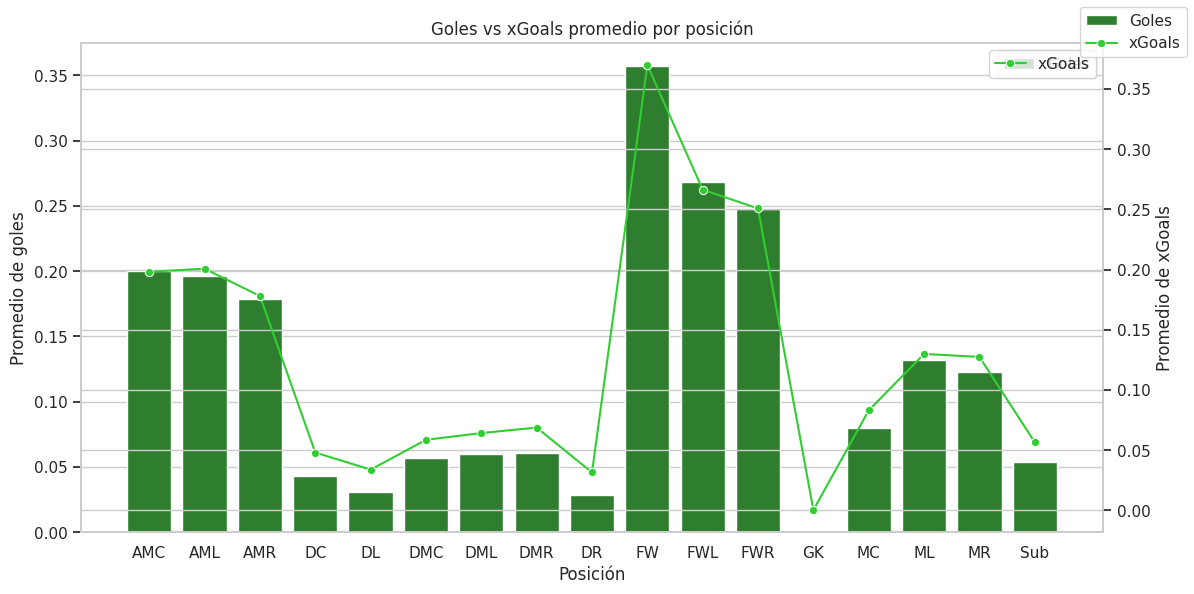

In [13]:
goals_xg = final_merged_df.groupby('position')[['goals', 'xGoals']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(data=goals_xg, x='position', y='goals', ax=ax1, color='forestgreen', label='Goles')
ax1.set_ylabel('Promedio de goles')
ax1.set_xlabel('Posición')

ax2 = ax1.twinx()
sns.lineplot(data=goals_xg, x='position', y='xGoals', ax=ax2, color='limegreen', marker='o', label='xGoals')
ax2.set_ylabel('Promedio de xGoals')

fig.legend(loc='upper right')
plt.title('Goles vs xGoals promedio por posición')
plt.tight_layout()
plt.show()


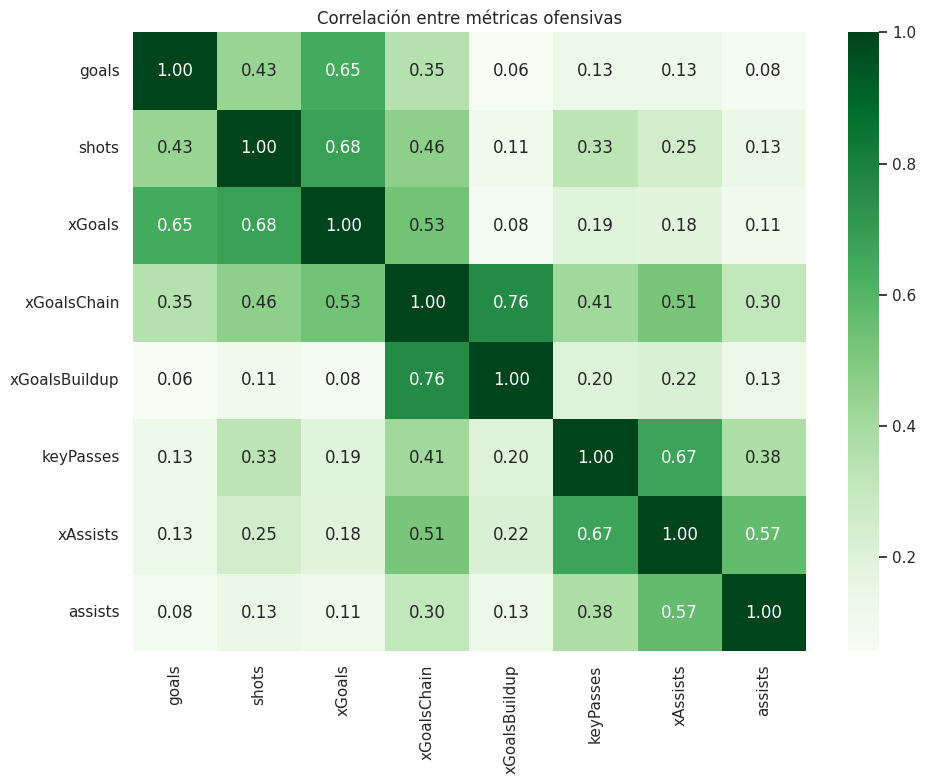

In [14]:
metrics = final_merged_df[['goals', 'shots', 'xGoals', 'xGoalsChain', 'xGoalsBuildup', 'keyPasses', 'xAssists', 'assists']]

plt.figure(figsize=(10,8))
sns.heatmap(metrics.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlación entre métricas ofensivas')
plt.tight_layout()
plt.show()


<ipython-input-16-150d8d071ba8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=final_merged_df, x='position', y='xGoals', palette='Greens')


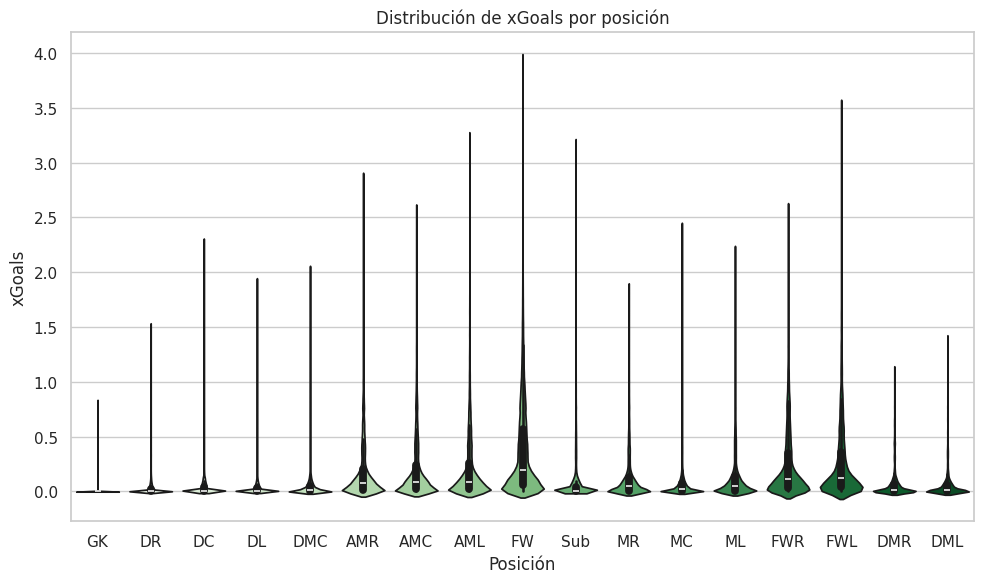

In [16]:
plt.figure(figsize=(10,6))
sns.violinplot(data=final_merged_df, x='position', y='xGoals', palette='Greens')
plt.title('Distribución de xGoals por posición')
plt.xlabel('Posición')
plt.ylabel('xGoals')
plt.tight_layout()
plt.show()


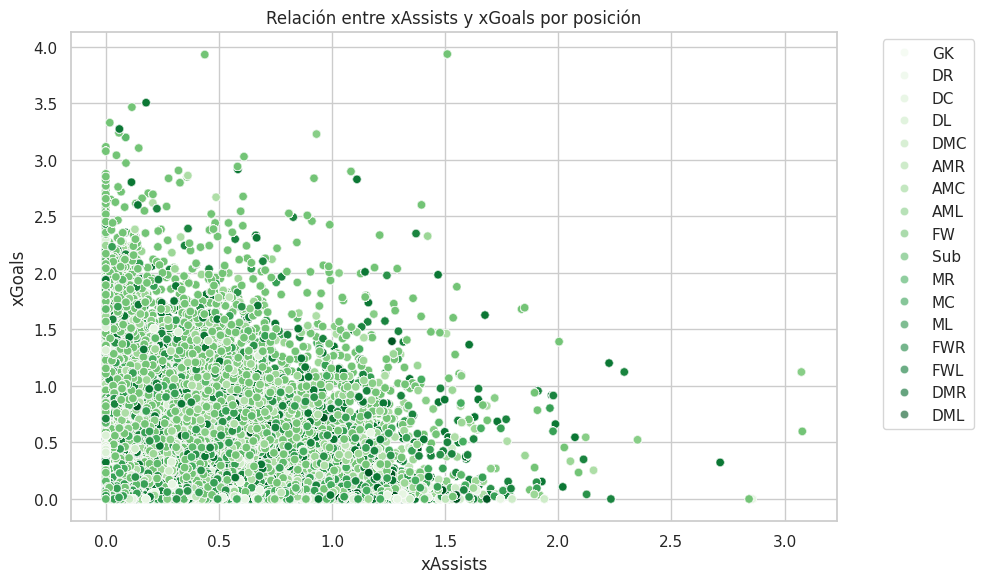

In [18]:
df_clean = final_merged_df.dropna(subset=['xGoals', 'xAssists'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='xAssists', y='xGoals', hue='position', alpha=0.6, palette='Greens')  # Cambia 'viridis' a 'Greens'
plt.title('Relación entre xAssists y xGoals por posición')
plt.xlabel('xAssists')
plt.ylabel('xGoals')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-20-5330262518fe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_merged_df, x='shotType', y='xGoal', palette='Greens', width=0.6)


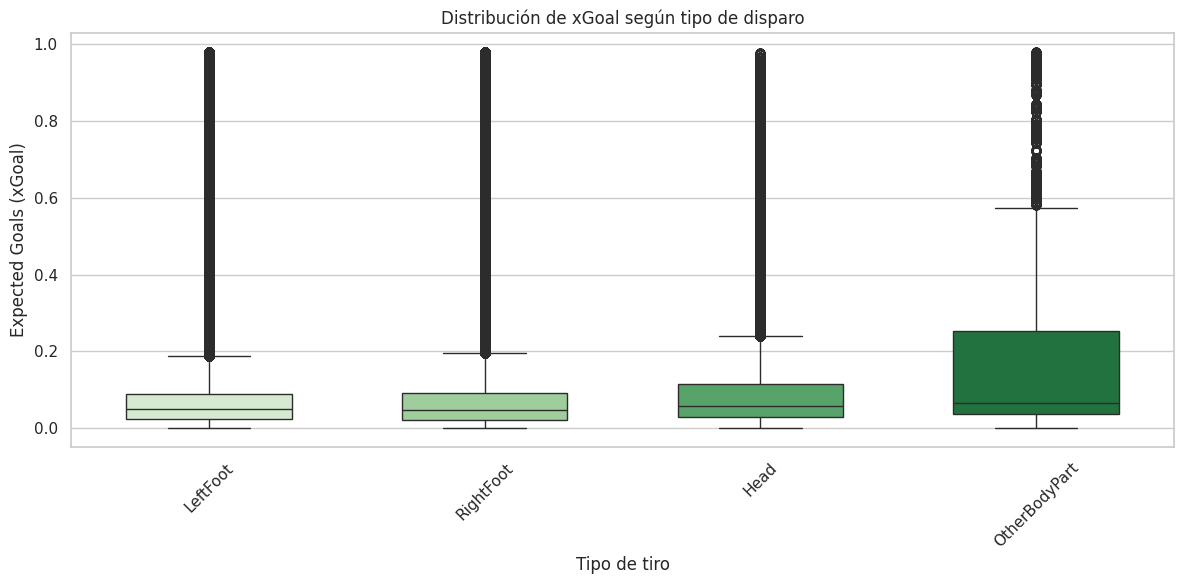

In [20]:
plt.figure(figsize=(12,6))

# Boxplot con los puntos superpuestos
sns.boxplot(data=final_merged_df, x='shotType', y='xGoal', palette='Greens', width=0.6)

plt.title('Distribución de xGoal según tipo de disparo')
plt.xlabel('Tipo de tiro')
plt.ylabel('Expected Goals (xGoal)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
